In [51]:
import pandas as pd
import os
from geopy.distance import geodesic

In [52]:
mack_df = pd.read_csv('./mackerel_fishery_combined_hydroclimate_V5.csv')
hydro_df = pd.read_excel('./hydro_climate.xlsx')

In [53]:
mack_df = mack_df.rename(columns={'지점번호': '지점'})
hydro_df['일자'] = hydro_df['일자'].astype('datetime64[ns]')

In [54]:
mack_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568012 entries, 0 to 568011
Data columns (total 23 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   일자        568012 non-null  object 
 1   출하수량      568012 non-null  int64  
 2   출하중량      568012 non-null  int64  
 3   출하금액      568012 non-null  int64  
 4   산지명       568012 non-null  object 
 5   어업명       568012 non-null  object 
 6   어선번호      568012 non-null  float64
 7   어선명       568012 non-null  object 
 8   상품코드      568012 non-null  int64  
 9   상품명       568012 non-null  object 
 10  산지코드      568012 non-null  float64
 11  지점명       568012 non-null  object 
 12  지점        568012 non-null  int64  
 13  위도        568012 non-null  float64
 14  경도        568012 non-null  float64
 15  평균기압      568012 non-null  float64
 16  평균 상대습도   568012 non-null  float64
 17  평균 기온     568012 non-null  float64
 18  평균 수온     568012 non-null  float64
 19  적정 수온     568012 non-null  float64
 20  최근저수

In [72]:
mack_df['일자'] = pd.to_datetime(mack_df['일자'])
# '일자'를 'yyyy-mm' 형식으로 변환
mack_df['년월'] = mack_df['일자'].dt.to_period('M').astype(str)
mack_df['년'] = mack_df['일자'].dt.to_period('Y').astype(str)

grouped_yr_df = mack_df.groupby(['년','지점']).agg({
    '지점명' : 'first',
    '위도' : 'first',
    '경도' : 'first',
    '평균기압': 'mean',
    '평균 상대습도': 'mean',
    '평균 기온': 'mean',
    '평균 수온': 'mean',
    '적정 수온': 'mean',
    '최근적정수온빈도': 'mean',
    '최근저수온빈도': 'mean',
    '출하수량': 'sum',
    '출하중량': 'sum',
}).reset_index()


In [ ]:
grouped_yr_df.to_csv('./yr_table.csv',index=False)

In [85]:
numeric_df = grouped_yr_df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()


In [89]:
correlation_matrix.to_csv('./data/corr_test.csv',index=False)

In [74]:
grouped_yr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   년         194 non-null    object 
 1   지점        194 non-null    int64  
 2   지점명       194 non-null    object 
 3   위도        194 non-null    float64
 4   경도        194 non-null    float64
 5   평균기압      194 non-null    float64
 6   평균 상대습도   194 non-null    float64
 7   평균 기온     194 non-null    float64
 8   평균 수온     194 non-null    float64
 9   적정 수온     194 non-null    float64
 10  최근적정수온빈도  194 non-null    float64
 11  최근저수온빈도   194 non-null    float64
 12  출하수량      194 non-null    int64  
 13  출하중량      194 non-null    int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 21.3+ KB


<Figure size 1000x600 with 0 Axes>

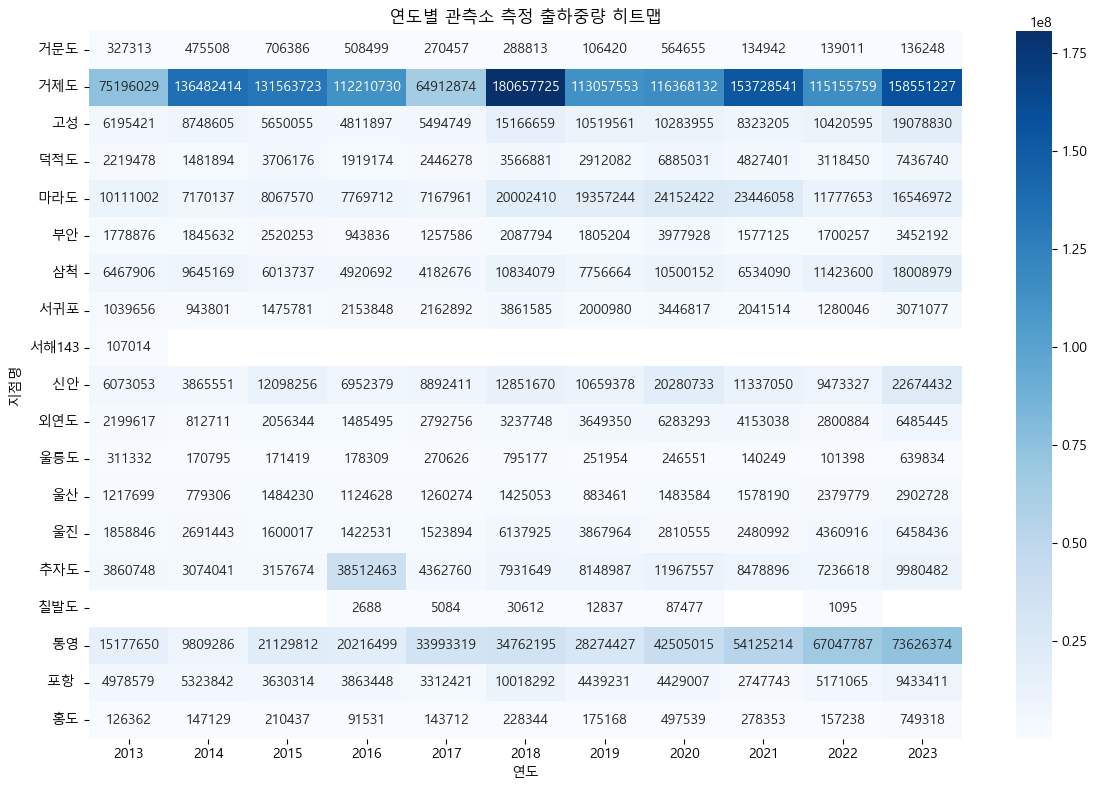

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# 피벗 테이블 생성: 연도별 지점명에 따른 출하중량
pivot_table = grouped_yr_df.pivot_table(index='지점명', columns='년', values='출하중량', aggfunc='sum')
# 경고 제거
warnings.filterwarnings('ignore')

plt.figure(figsize=(10,6))
# 한글 글꼴 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 맑은 고딕
plt.rcParams['axes.unicode_minus'] = False     # 마이너스 깨짐 방지
# 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='Blues')
plt.title('연도별 관측소 측정 출하중량 히트맵')
plt.xlabel('연도')
plt.ylabel('지점명')
plt.tight_layout()
plt.show()


In [55]:
mack_grouped = mack_df.groupby(['일자', '지점']).agg({
  '지점명' : 'first',
  '출하중량': 'sum'
}).reset_index()


In [56]:
hydro_df['일자'] = pd.to_datetime(hydro_df['일자'])
mack_grouped['일자'] = pd.to_datetime(mack_grouped['일자'])


In [57]:
merged_df = hydro_df.merge(
    mack_grouped,
    on=['일자', '지점'],
    how='left'
)


In [59]:
mack_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45858 entries, 0 to 45857
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일자      45858 non-null  datetime64[ns]
 1   지점      45858 non-null  int64         
 2   지점명     45858 non-null  object        
 3   출하중량    45858 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 1.4+ MB
